Objective: To analyze and derive insights from the batting and pitching performance data of the Toronto Blue Jays to assist in strategic decision-making.

> 
**Data Description**
> 
The analysis is based on two primary datasets: batting and pitching data. Each dataset contains a variety of columns representing different aspects of player performance.
> 
Batting Data (df_bat):
> 
Rank: Player's rank.
Year: Year of the performance.
Position: Player's fielding position.
Name: Player's name.
Age: Player's age.
Games: Number of games played.
Plate_Appearances: Number of plate appearances.
At_Bats: Number of at-bats.
Runs: Number of runs scored.
Hits: Number of hits.
Doubles: Number of doubles.
Triples: Number of triples.
Home_Runs: Number of home runs.
Runs_Batted_In: Number of runs batted in.
Stolen_Bases: Number of stolen bases.
Caught_Stealing: Number of times caught stealing.
Base_On_Balls: Number of walks.
Strikeouts: Number of strikeouts.
Batting_Average: Player's batting average.
On_Base_Percentage: Player's on-base percentage.
Slugging_Percentage: Player's slugging percentage.
On_Base_Plus_Slugging_Percentage: Player's OPS (on-base plus slugging percentage).
On_Base_Plus_Slugging_Percentage_Plus: Adjusted OPS.
Total_Bases: Total bases.
Double_Plays_Grounded_Into: Number of double plays grounded into.
Times_Hit_By_Pitch: Number of times hit by pitch.
Sacrifice_Hits: Number of sacrifice hits.
Sacrifice_Flies: Number of sacrifice flies.
Intentional_Bases_on_Balls: Number of intentional walks.
Dominant_Hand: Player's dominant hand.
Switch_Hitter: Indicates if the player is a switch hitter.
Pitching Data (df_pit):
> 
Columns are similar to the batting data but from the perspective of pitching performance, including relevant metrics for evaluating pitchers' effectiveness.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bat = pd.read_csv('/kaggle/input/toronto-blue-jays-batting-and-pitching-1977-2023/TOR_batting.csv')
df_pit = pd.read_csv('/kaggle/input/toronto-blue-jays-batting-and-pitching-1977-2023/TOR_batting.csv')

In [3]:
df_bat.head()

Rank  Year Position                   Name  Age  Games  Plate_Appearances  \
0     1  2023        C         Alejandro Kirk   24    123                422   
1     2  2023       1B  Vladimir Guerrero Jr.   24    156                682   
2     3  2023       2B        Whit Merrifield   34    145                592   
3     4  2023       SS            Bo Bichette   25    135                601   
4     5  2023       3B           Matt Chapman   30    140                581   

   At_Bats  Runs  Hits  ...  On_Base_Plus_Slugging_Percentage  \
0      372    34    93  ...                             0.692   
1      602    78   159  ...                             0.788   
2      547    66   149  ...                             0.700   
3      571    69   175  ...                             0.814   
4      509    66   122  ...                             0.755   

   On_Base_Plus_Slugging_Percentage_Plus  Total_Bases  \
0                                     93          133   
1                                    117          267   
2                                     94          209   
3                                    123          271   
4                                    108          216   

   Double_Plays_Grounded_Into  Times_Hit_By_Pitch  Sacrifice_Hits  \
0                          21                   6               0   
1                          23                   9               0   
2                          15                   3               0   
3                          14                   2               0   
4                           4                   8               0   

   Sacrifice_Flies  Intentional_Bases_on_Balls  Dominant_Hand  Switch_Hitter  
0                2                           1          Right             No  
1                4                           5          Right             No  
2                6                           2          Right             No  
3                1                           0          Right             No  
4                2                           1          Right             No  

[5 rows x 31 columns]

In [4]:
df_pit.head()

Rank  Year Position                   Name  Age  Games  Plate_Appearances  \
0     1  2023        C         Alejandro Kirk   24    123                422   
1     2  2023       1B  Vladimir Guerrero Jr.   24    156                682   
2     3  2023       2B        Whit Merrifield   34    145                592   
3     4  2023       SS            Bo Bichette   25    135                601   
4     5  2023       3B           Matt Chapman   30    140                581   

   At_Bats  Runs  Hits  ...  On_Base_Plus_Slugging_Percentage  \
0      372    34    93  ...                             0.692   
1      602    78   159  ...                             0.788   
2      547    66   149  ...                             0.700   
3      571    69   175  ...                             0.814   
4      509    66   122  ...                             0.755   

   On_Base_Plus_Slugging_Percentage_Plus  Total_Bases  \
0                                     93          133   
1                                    117          267   
2                                     94          209   
3                                    123          271   
4                                    108          216   

   Double_Plays_Grounded_Into  Times_Hit_By_Pitch  Sacrifice_Hits  \
0                          21                   6               0   
1                          23                   9               0   
2                          15                   3               0   
3                          14                   2               0   
4                           4                   8               0   

   Sacrifice_Flies  Intentional_Bases_on_Balls  Dominant_Hand  Switch_Hitter  
0                2                           1          Right             No  
1                4                           5          Right             No  
2                6                           2          Right             No  
3                1                           0          Right             No  
4                2                           1          Right             No  

[5 rows x 31 columns]

In [5]:
df_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rank                                   2075 non-null   int64  
 1   Year                                   2075 non-null   int64  
 2   Position                               2070 non-null   object 
 3   Name                                   2075 non-null   object 
 4   Age                                    2075 non-null   int64  
 5   Games                                  2075 non-null   int64  
 6   Plate_Appearances                      2075 non-null   int64  
 7   At_Bats                                2075 non-null   int64  
 8   Runs                                   2075 non-null   int64  
 9   Hits                                   2075 non-null   int64  
 10  Doubles                                2075 non-null   int64  
 11  Trip

In [6]:
df_pit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rank                                   2075 non-null   int64  
 1   Year                                   2075 non-null   int64  
 2   Position                               2070 non-null   object 
 3   Name                                   2075 non-null   object 
 4   Age                                    2075 non-null   int64  
 5   Games                                  2075 non-null   int64  
 6   Plate_Appearances                      2075 non-null   int64  
 7   At_Bats                                2075 non-null   int64  
 8   Runs                                   2075 non-null   int64  
 9   Hits                                   2075 non-null   int64  
 10  Doubles                                2075 non-null   int64  
 11  Trip

In [7]:
# Generate summary statistics
df_bat.describe(include='all')


Rank         Year Position        Name          Age  \
count   2075.000000  2075.000000     2070        2075  2075.000000   
unique          NaN          NaN       15         912          NaN   
top             NaN          NaN        P  Dave Stieb          NaN   
freq            NaN          NaN     1030          15          NaN   
mean      23.282410  2001.969157      NaN         NaN    28.013976   
std       13.999217    13.574538      NaN         NaN     4.139363   
min        1.000000  1977.000000      NaN         NaN    18.000000   
25%       12.000000  1990.500000      NaN         NaN    25.000000   
50%       23.000000  2003.000000      NaN         NaN    27.000000   
75%       34.000000  2014.000000      NaN         NaN    31.000000   
max       63.000000  2023.000000      NaN         NaN    48.000000   

              Games  Plate_Appearances      At_Bats         Runs         Hits  \
count   2075.000000        2075.000000  2075.000000  2075.000000  2075.000000   
unique          NaN                NaN          NaN          NaN          NaN   
top             NaN                NaN          NaN          NaN          NaN   
freq            NaN                NaN          NaN          NaN          NaN   
mean      37.722410         136.267470   122.103614    16.514699    31.811084   
std       52.302704         209.582743   187.561789    27.365947    51.115257   
min        0.000000           0.000000     0.000000     0.000000     0.000000   
25%        0.000000           0.000000     0.000000     0.000000     0.000000   
50%        4.000000           5.000000     5.000000     0.000000     0.000000   
75%       69.000000         217.000000   192.000000    23.000000    48.000000   
max      163.000000         735.000000   687.000000   134.000000   215.000000   

        ...  On_Base_Plus_Slugging_Percentage  \
count   ...                       2075.000000   
unique  ...                               NaN   
top     ...                               NaN   
freq    ...                               NaN   
mean    ...                          0.351128   
std     ...                          0.377848   
min     ...                          0.000000   
25%     ...                          0.000000   
50%     ...                          0.200000   
75%     ...                          0.697000   
max     ...                          3.000000   

        On_Base_Plus_Slugging_Percentage_Plus  Total_Bases  \
count                             2075.000000  2075.000000   
unique                                    NaN          NaN   
top                                       NaN          NaN   
freq                                      NaN          NaN   
mean                                35.755663    51.222169   
std                                 68.877755    84.571353   
min                               -100.000000     0.000000   
25%                                  0.000000     0.000000   
50%                                  0.000000     0.000000   
75%                                 87.000000    72.000000   
max                                654.000000   378.000000   

        Double_Plays_Grounded_Into  Times_Hit_By_Pitch  Sacrifice_Hits  \
count                  2075.000000         2075.000000     2075.000000   
unique                         NaN                 NaN             NaN   
top                            NaN                 NaN             NaN   
freq                           NaN                 NaN             NaN   
mean                      2.779277            1.122410        0.711807   
std                       4.744327            2.438927        1.823671   
min                       0.000000            0.000000        0.000000   
25%                       0.000000            0.000000        0.000000   
50%                       0.000000            0.000000        0.000000   
75%                       4.000000            1.000000        0.000000   
max                      26.000000           22.00000

In [8]:
# Check for missing values
df_bat.isnull().sum()


Rank                                     0
Year                                     0
Position                                 5
Name                                     0
Age                                      0
Games                                    0
Plate_Appearances                        0
At_Bats                                  0
Runs                                     0
Hits                                     0
Doubles                                  0
Triples                                  0
Home_Runs                                0
Runs_Batted_In                           0
Stolen_Bases                             0
Caught_Stealing                          0
Base_On_Balls                            0
Strikeouts                               0
Batting_Average                          0
On_Base_Percentage                       0
Slugging_Percentage                      0
On_Base_Plus_Slugging_Percentage         0
On_Base_Plus_Slugging_Percentage_Plus    0
Total_Bases

In [9]:
# Data types and unique values
print(df_bat.dtypes)
df_bat.nunique()


Rank                                       int64
Year                                       int64
Position                                  object
Name                                      object
Age                                        int64
Games                                      int64
Plate_Appearances                          int64
At_Bats                                    int64
Runs                                       int64
Hits                                       int64
Doubles                                    int64
Triples                                    int64
Home_Runs                                  int64
Runs_Batted_In                             int64
Stolen_Bases                               int64
Caught_Stealing                            int64
Base_On_Balls                              int64
Strikeouts                                 int64
Batting_Average                          float64
On_Base_Percentage                       float64
Slugging_Percentage 

Rank                                      63
Year                                      47
Position                                  15
Name                                     912
Age                                       27
Games                                    163
Plate_Appearances                        504
At_Bats                                  490
Runs                                     120
Hits                                     195
Doubles                                   51
Triples                                   14
Home_Runs                                 50
Runs_Batted_In                           122
Stolen_Bases                              47
Caught_Stealing                           21
Base_On_Balls                             97
Strikeouts                               153
Batting_Average                          220
On_Base_Percentage                       247
Slugging_Percentage                      365
On_Base_Plus_Slugging_Percentage         496
On_Base_Pl

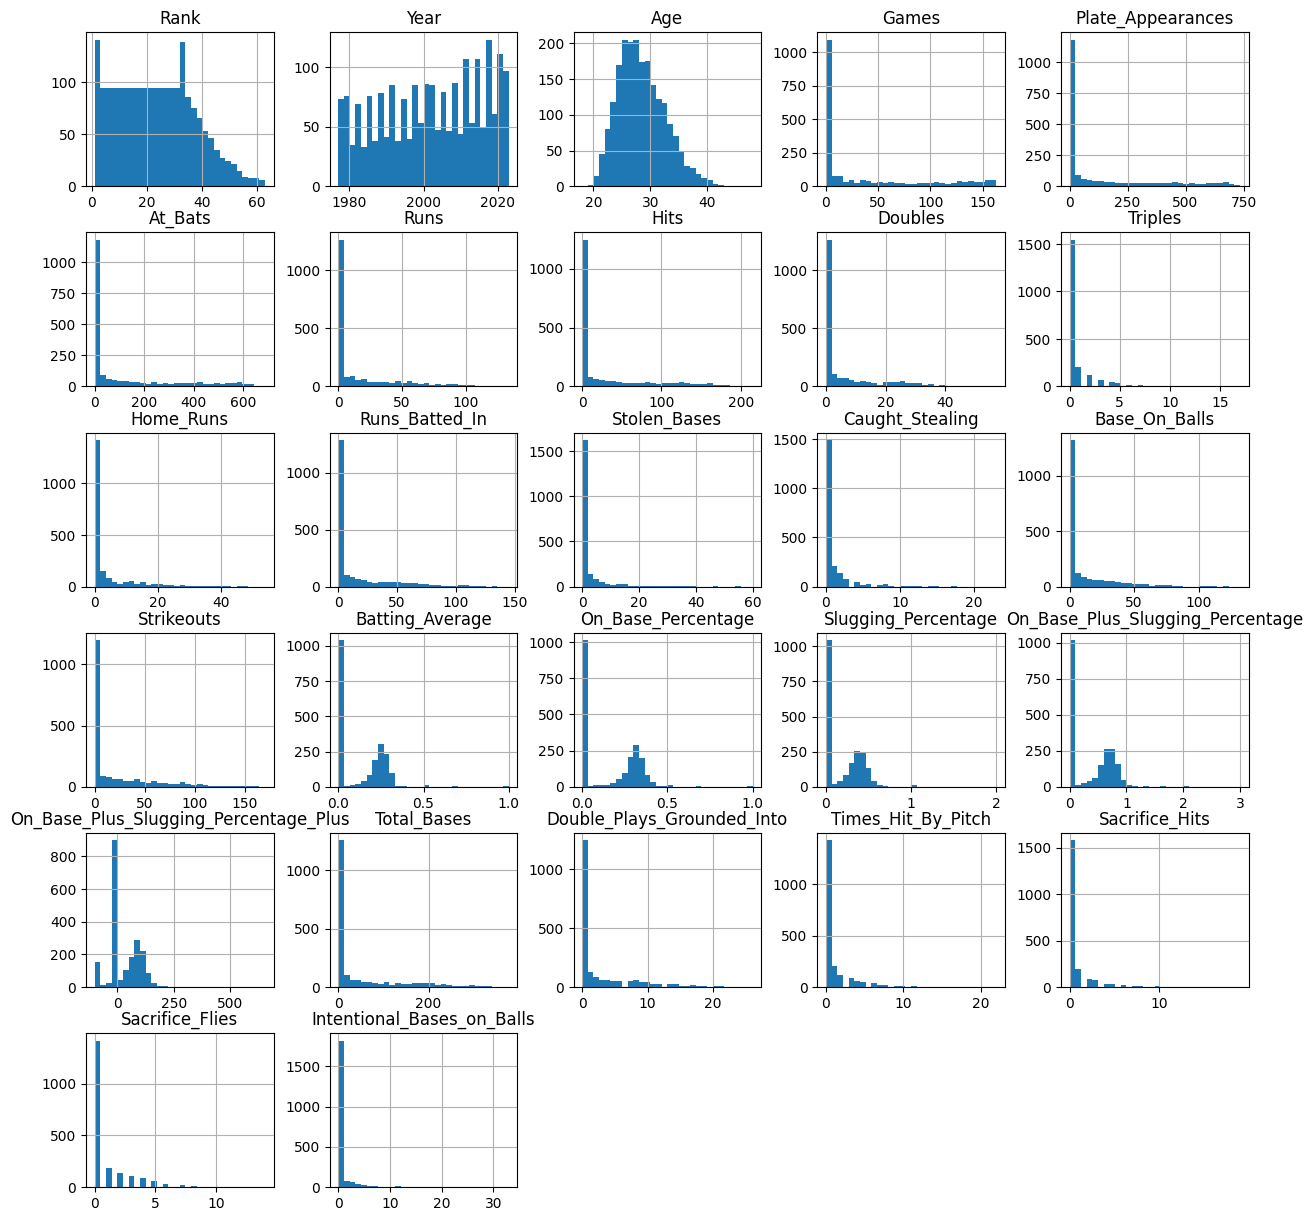

In [10]:
# Plot histograms for numerical features
df_bat.hist(figsize=(15, 15), bins=30)
plt.show()


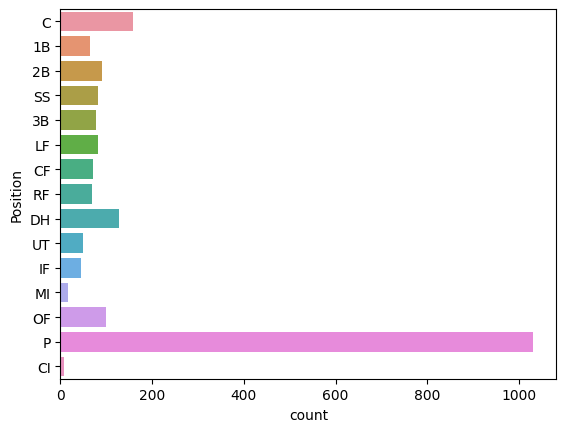

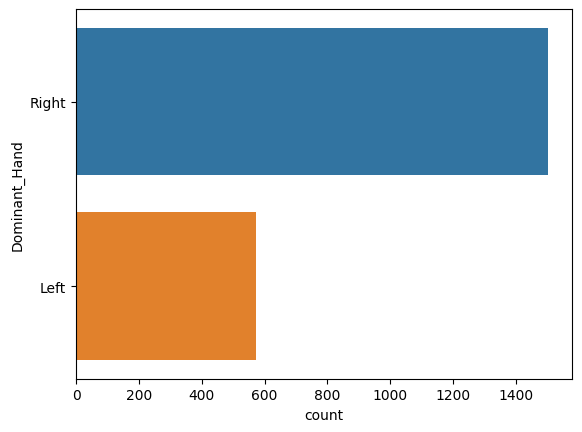

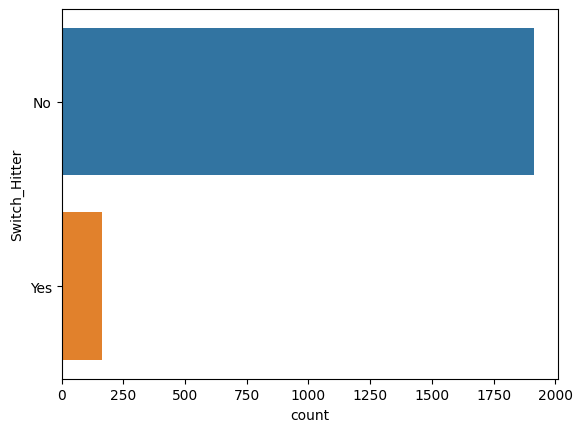

In [11]:
# Plot bar plots for categorical features
categorical_features = ['Position', 'Dominant_Hand', 'Switch_Hitter']
for feature in categorical_features:
    sns.countplot(y=feature, data=df_bat)
    plt.show()


In [12]:
# Generate summary statistics
df_pit.describe(include='all')


Rank         Year Position        Name          Age  \
count   2075.000000  2075.000000     2070        2075  2075.000000   
unique          NaN          NaN       15         912          NaN   
top             NaN          NaN        P  Dave Stieb          NaN   
freq            NaN          NaN     1030          15          NaN   
mean      23.282410  2001.969157      NaN         NaN    28.013976   
std       13.999217    13.574538      NaN         NaN     4.139363   
min        1.000000  1977.000000      NaN         NaN    18.000000   
25%       12.000000  1990.500000      NaN         NaN    25.000000   
50%       23.000000  2003.000000      NaN         NaN    27.000000   
75%       34.000000  2014.000000      NaN         NaN    31.000000   
max       63.000000  2023.000000      NaN         NaN    48.000000   

              Games  Plate_Appearances      At_Bats         Runs         Hits  \
count   2075.000000        2075.000000  2075.000000  2075.000000  2075.000000   
unique          NaN                NaN          NaN          NaN          NaN   
top             NaN                NaN          NaN          NaN          NaN   
freq            NaN                NaN          NaN          NaN          NaN   
mean      37.722410         136.267470   122.103614    16.514699    31.811084   
std       52.302704         209.582743   187.561789    27.365947    51.115257   
min        0.000000           0.000000     0.000000     0.000000     0.000000   
25%        0.000000           0.000000     0.000000     0.000000     0.000000   
50%        4.000000           5.000000     5.000000     0.000000     0.000000   
75%       69.000000         217.000000   192.000000    23.000000    48.000000   
max      163.000000         735.000000   687.000000   134.000000   215.000000   

        ...  On_Base_Plus_Slugging_Percentage  \
count   ...                       2075.000000   
unique  ...                               NaN   
top     ...                               NaN   
freq    ...                               NaN   
mean    ...                          0.351128   
std     ...                          0.377848   
min     ...                          0.000000   
25%     ...                          0.000000   
50%     ...                          0.200000   
75%     ...                          0.697000   
max     ...                          3.000000   

        On_Base_Plus_Slugging_Percentage_Plus  Total_Bases  \
count                             2075.000000  2075.000000   
unique                                    NaN          NaN   
top                                       NaN          NaN   
freq                                      NaN          NaN   
mean                                35.755663    51.222169   
std                                 68.877755    84.571353   
min                               -100.000000     0.000000   
25%                                  0.000000     0.000000   
50%                                  0.000000     0.000000   
75%                                 87.000000    72.000000   
max                                654.000000   378.000000   

        Double_Plays_Grounded_Into  Times_Hit_By_Pitch  Sacrifice_Hits  \
count                  2075.000000         2075.000000     2075.000000   
unique                         NaN                 NaN             NaN   
top                            NaN                 NaN             NaN   
freq                           NaN                 NaN             NaN   
mean                      2.779277            1.122410        0.711807   
std                       4.744327            2.438927        1.823671   
min                       0.000000            0.000000        0.000000   
25%                       0.000000            0.000000        0.000000   
50%                       0.000000            0.000000        0.000000   
75%                       4.000000            1.000000        0.000000   
max                      26.000000           22.00000

In [13]:
# Check for missing values
df_pit.isnull().sum()


Rank                                     0
Year                                     0
Position                                 5
Name                                     0
Age                                      0
Games                                    0
Plate_Appearances                        0
At_Bats                                  0
Runs                                     0
Hits                                     0
Doubles                                  0
Triples                                  0
Home_Runs                                0
Runs_Batted_In                           0
Stolen_Bases                             0
Caught_Stealing                          0
Base_On_Balls                            0
Strikeouts                               0
Batting_Average                          0
On_Base_Percentage                       0
Slugging_Percentage                      0
On_Base_Plus_Slugging_Percentage         0
On_Base_Plus_Slugging_Percentage_Plus    0
Total_Bases

In [14]:
# Data types and unique values
print(df_pit.dtypes)
df_pit.nunique()


Rank                                       int64
Year                                       int64
Position                                  object
Name                                      object
Age                                        int64
Games                                      int64
Plate_Appearances                          int64
At_Bats                                    int64
Runs                                       int64
Hits                                       int64
Doubles                                    int64
Triples                                    int64
Home_Runs                                  int64
Runs_Batted_In                             int64
Stolen_Bases                               int64
Caught_Stealing                            int64
Base_On_Balls                              int64
Strikeouts                                 int64
Batting_Average                          float64
On_Base_Percentage                       float64
Slugging_Percentage 

Rank                                      63
Year                                      47
Position                                  15
Name                                     912
Age                                       27
Games                                    163
Plate_Appearances                        504
At_Bats                                  490
Runs                                     120
Hits                                     195
Doubles                                   51
Triples                                   14
Home_Runs                                 50
Runs_Batted_In                           122
Stolen_Bases                              47
Caught_Stealing                           21
Base_On_Balls                             97
Strikeouts                               153
Batting_Average                          220
On_Base_Percentage                       247
Slugging_Percentage                      365
On_Base_Plus_Slugging_Percentage         496
On_Base_Pl

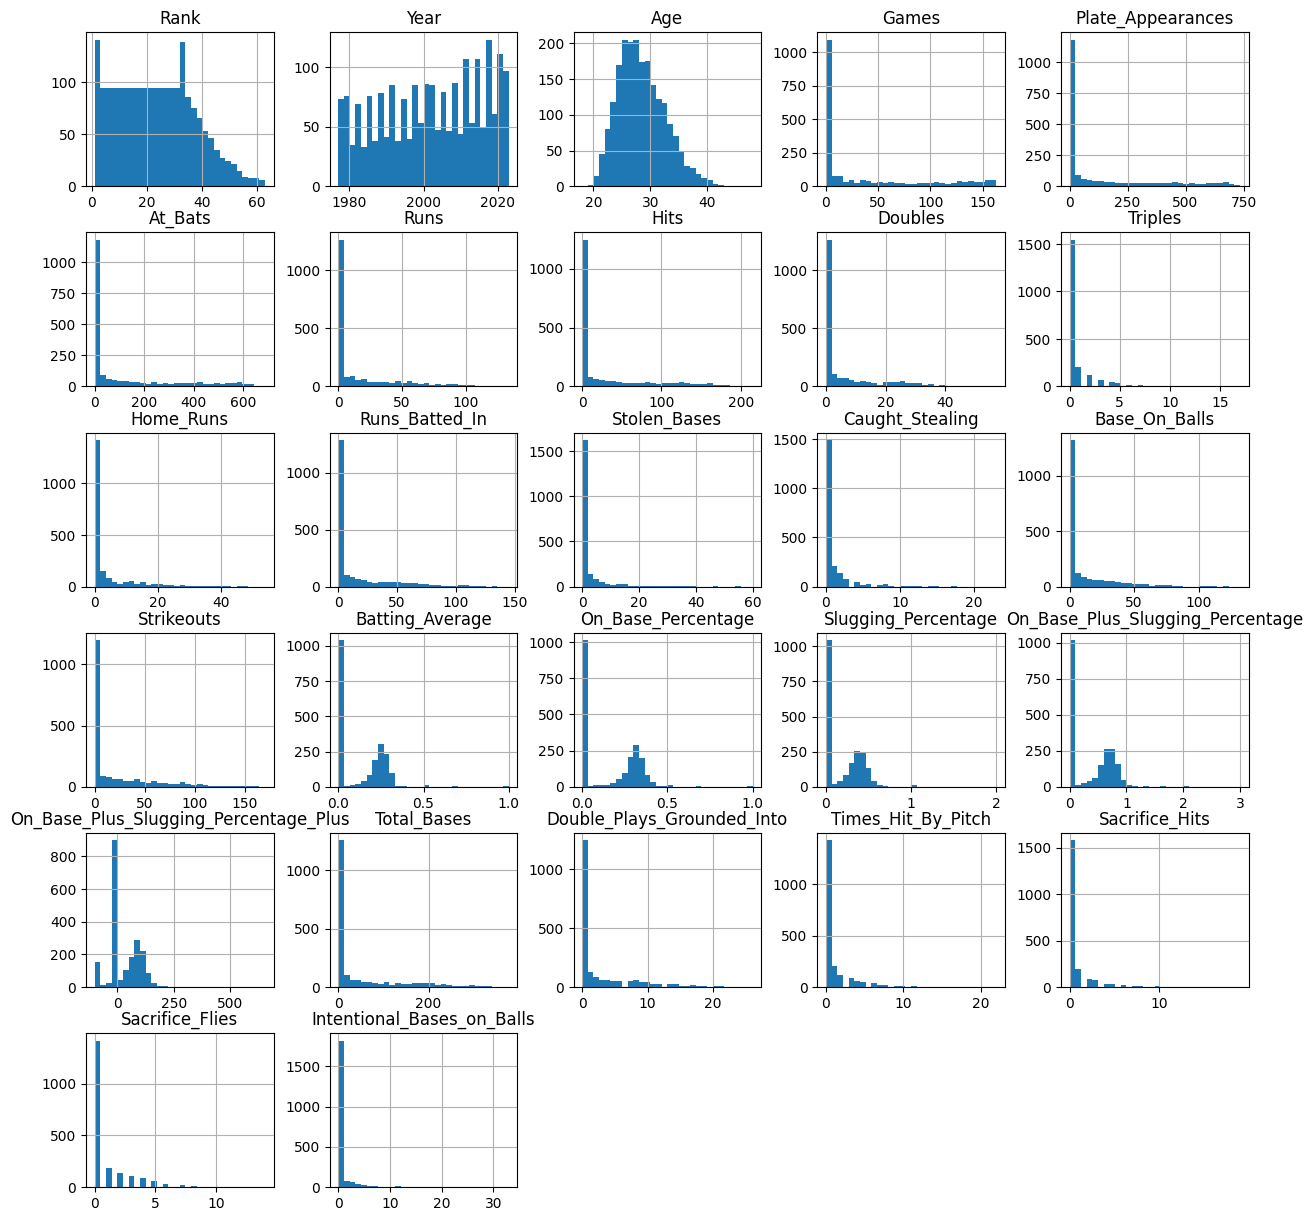

In [15]:
# Plot histograms for numerical features
df_pit.hist(figsize=(15, 15), bins=30)
plt.show()


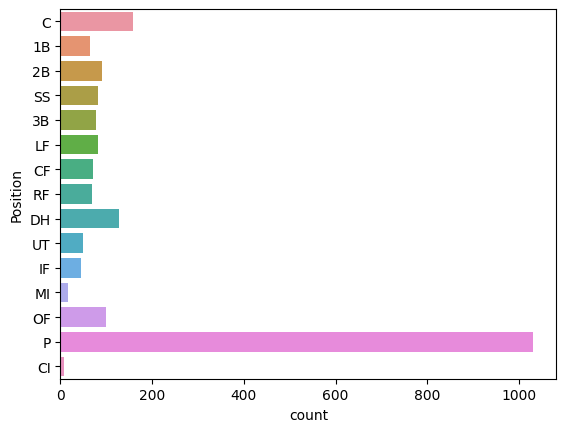

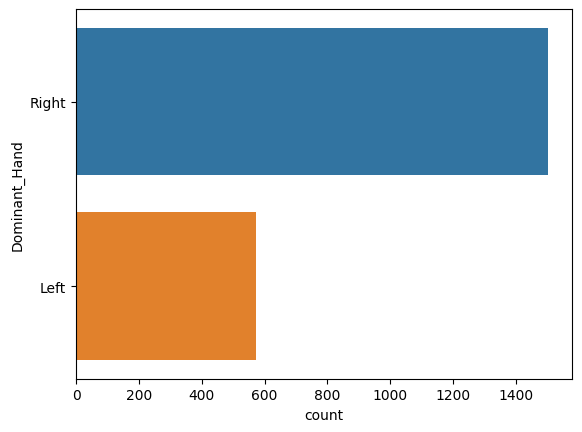

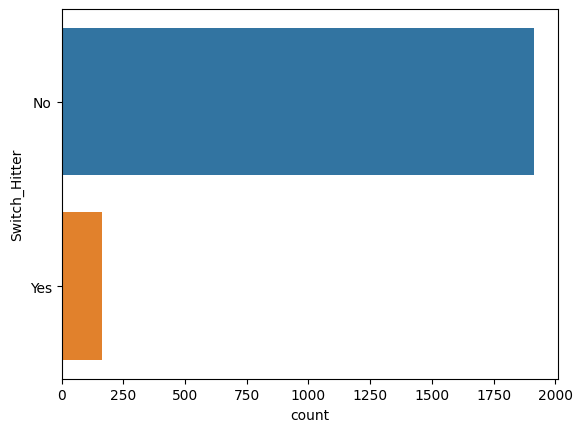

In [16]:
# Plot bar plots for categorical features
categorical_features = ['Position', 'Dominant_Hand', 'Switch_Hitter']
for feature in categorical_features:
    sns.countplot(y=feature, data=df_pit)
    plt.show()


In [17]:
print("df_bat columns:", df_bat.columns)
print("df_pit columns:", df_pit.columns)

df_bat columns: Index(['Rank', 'Year', 'Position', 'Name', 'Age', 'Games', 'Plate_Appearances',
       'At_Bats', 'Runs', 'Hits', 'Doubles', 'Triples', 'Home_Runs',
       'Runs_Batted_In', 'Stolen_Bases', 'Caught_Stealing', 'Base_On_Balls',
       'Strikeouts', 'Batting_Average', 'On_Base_Percentage',
       'Slugging_Percentage', 'On_Base_Plus_Slugging_Percentage',
       'On_Base_Plus_Slugging_Percentage_Plus', 'Total_Bases',
       'Double_Plays_Grounded_Into', 'Times_Hit_By_Pitch', 'Sacrifice_Hits',
       'Sacrifice_Flies', 'Intentional_Bases_on_Balls', 'Dominant_Hand',
       'Switch_Hitter'],
      dtype='object')
df_pit columns: Index(['Rank', 'Year', 'Position', 'Name', 'Age', 'Games', 'Plate_Appearances',
       'At_Bats', 'Runs', 'Hits', 'Doubles', 'Triples', 'Home_Runs',
       'Runs_Batted_In', 'Stolen_Bases', 'Caught_Stealing', 'Base_On_Balls',
       'Strikeouts', 'Batting_Average', 'On_Base_Percentage',
       'Slugging_Percentage', 'On_Base_Plus_Slugging_Percentage',


In [18]:
# Merge the datasets on 'Name' and 'Year'
combined_df = pd.merge(df_bat, df_pit, on=['Name', 'Year'], suffixes=('_bat', '_pit'))

# Display the first few rows of the combined dataset
print("Combined DataFrame:")
print(combined_df.head())
print("\n")

Combined DataFrame:
   Rank_bat  Year Position_bat                   Name  Age_bat  Games_bat  \
0         1  2023            C         Alejandro Kirk       24        123   
1         2  2023           1B  Vladimir Guerrero Jr.       24        156   
2         3  2023           2B        Whit Merrifield       34        145   
3         4  2023           SS            Bo Bichette       25        135   
4         5  2023           3B           Matt Chapman       30        140   

   Plate_Appearances_bat  At_Bats_bat  Runs_bat  Hits_bat  ...  \
0                    422          372        34        93  ...   
1                    682          602        78       159  ...   
2                    592          547        66       149  ...   
3                    601          571        69       175  ...   
4                    581          509        66       122  ...   

   On_Base_Plus_Slugging_Percentage_pit  \
0                                 0.692   
1                                 

In [19]:
# Check for missing values in the combined dataframe
print("Missing values in combined dataframe:")
print(combined_df.isnull().sum())


Missing values in combined dataframe:
Rank_bat                                     0
Year                                         0
Position_bat                                 5
Name                                         0
Age_bat                                      0
Games_bat                                    0
Plate_Appearances_bat                        0
At_Bats_bat                                  0
Runs_bat                                     0
Hits_bat                                     0
Doubles_bat                                  0
Triples_bat                                  0
Home_Runs_bat                                0
Runs_Batted_In_bat                           0
Stolen_Bases_bat                             0
Caught_Stealing_bat                          0
Base_On_Balls_bat                            0
Strikeouts_bat                               0
Batting_Average_bat                          0
On_Base_Percentage_bat                       0
Slugging_Percentage_ba

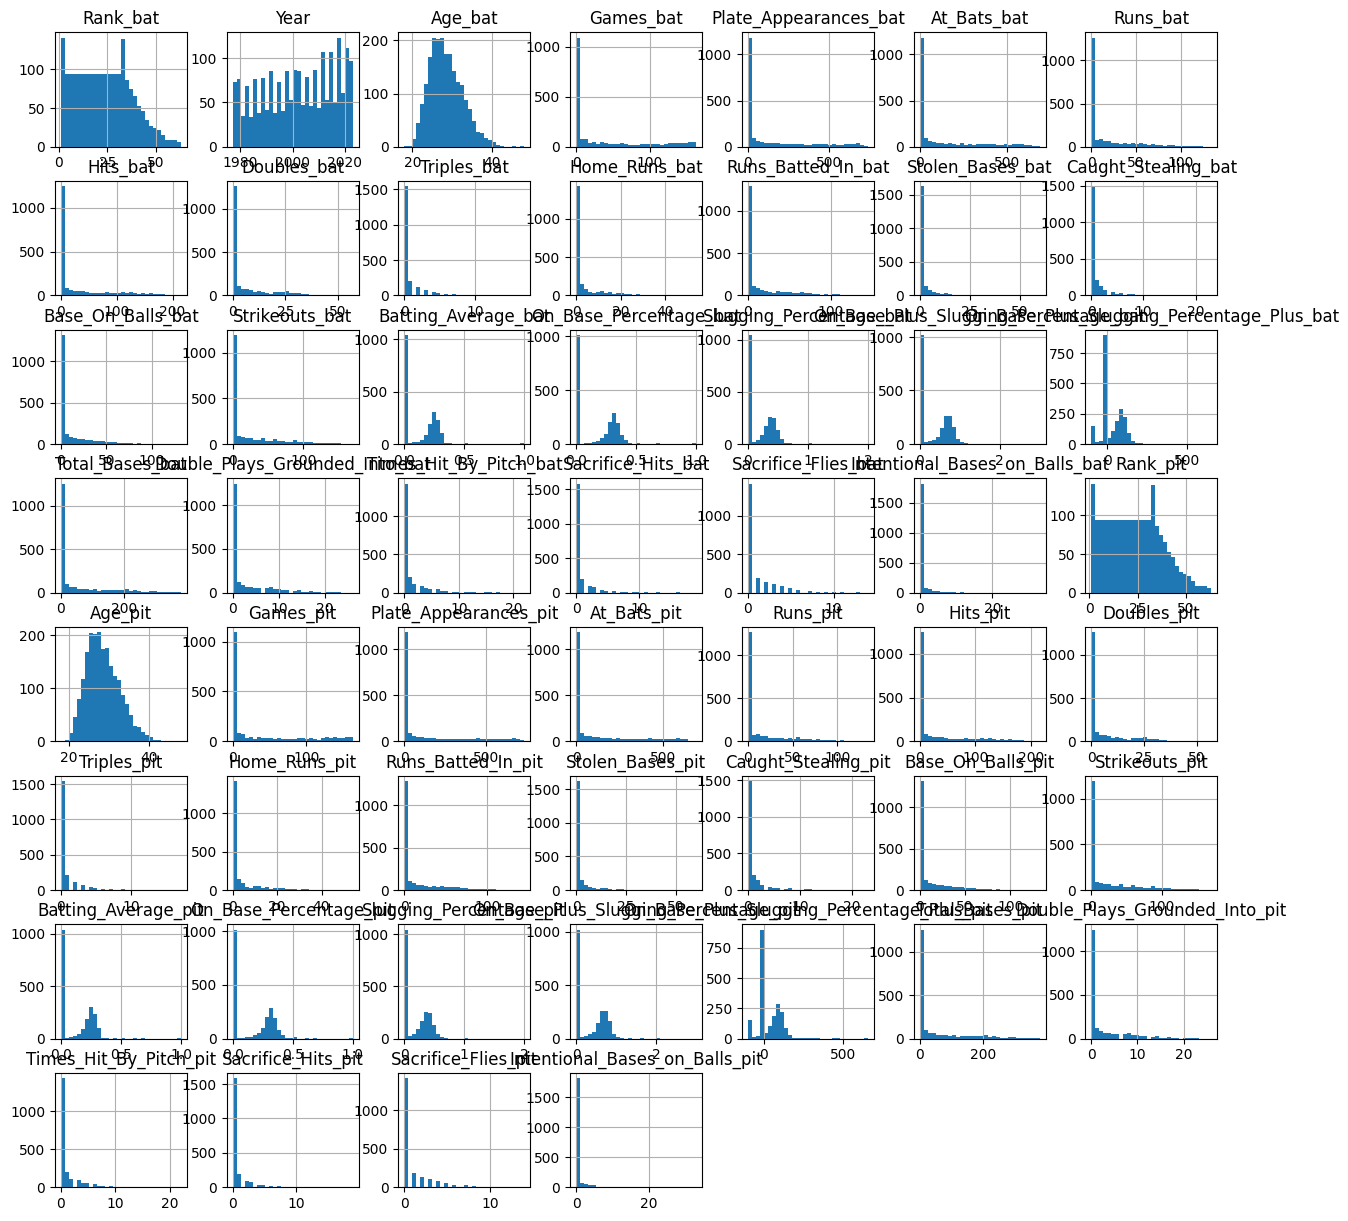

In [20]:
# Plot histograms for numerical features in the combined dataframe
combined_df.hist(figsize=(15, 15), bins=30)
plt.show()


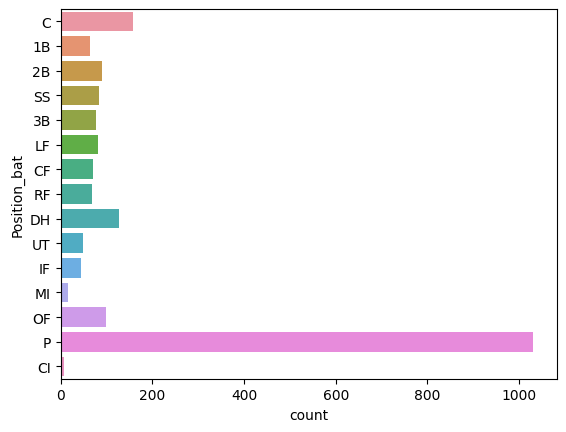

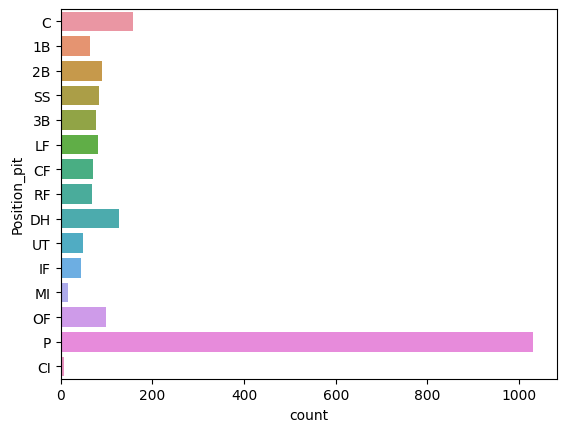

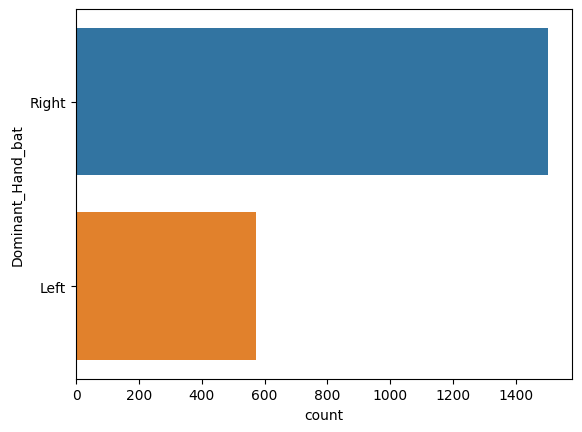

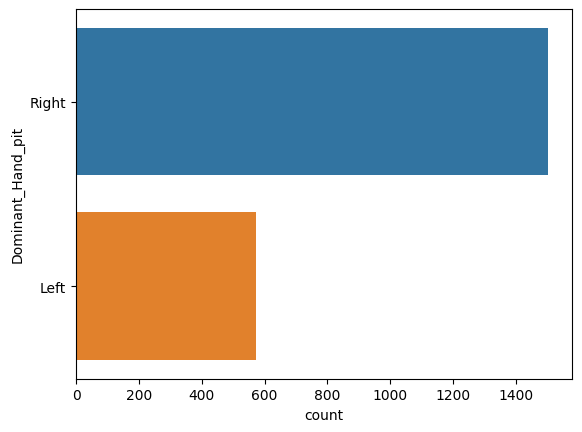

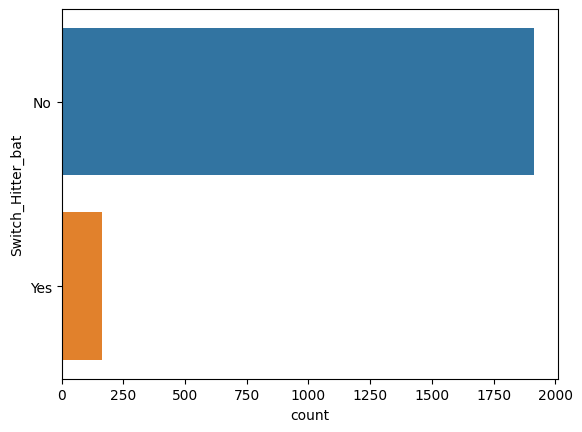

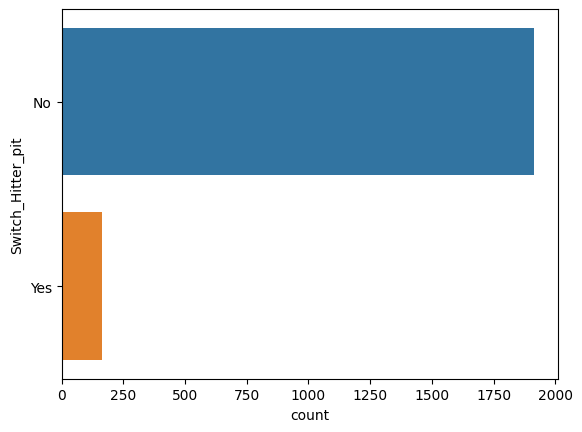

In [21]:
# Plot bar plots for categorical features in the combined dataframe
categorical_features = ['Position_bat', 'Position_pit', 'Dominant_Hand_bat', 'Dominant_Hand_pit', 'Switch_Hitter_bat', 'Switch_Hitter_pit']
for feature in categorical_features:
    sns.countplot(y=feature, data=combined_df)
    plt.show()


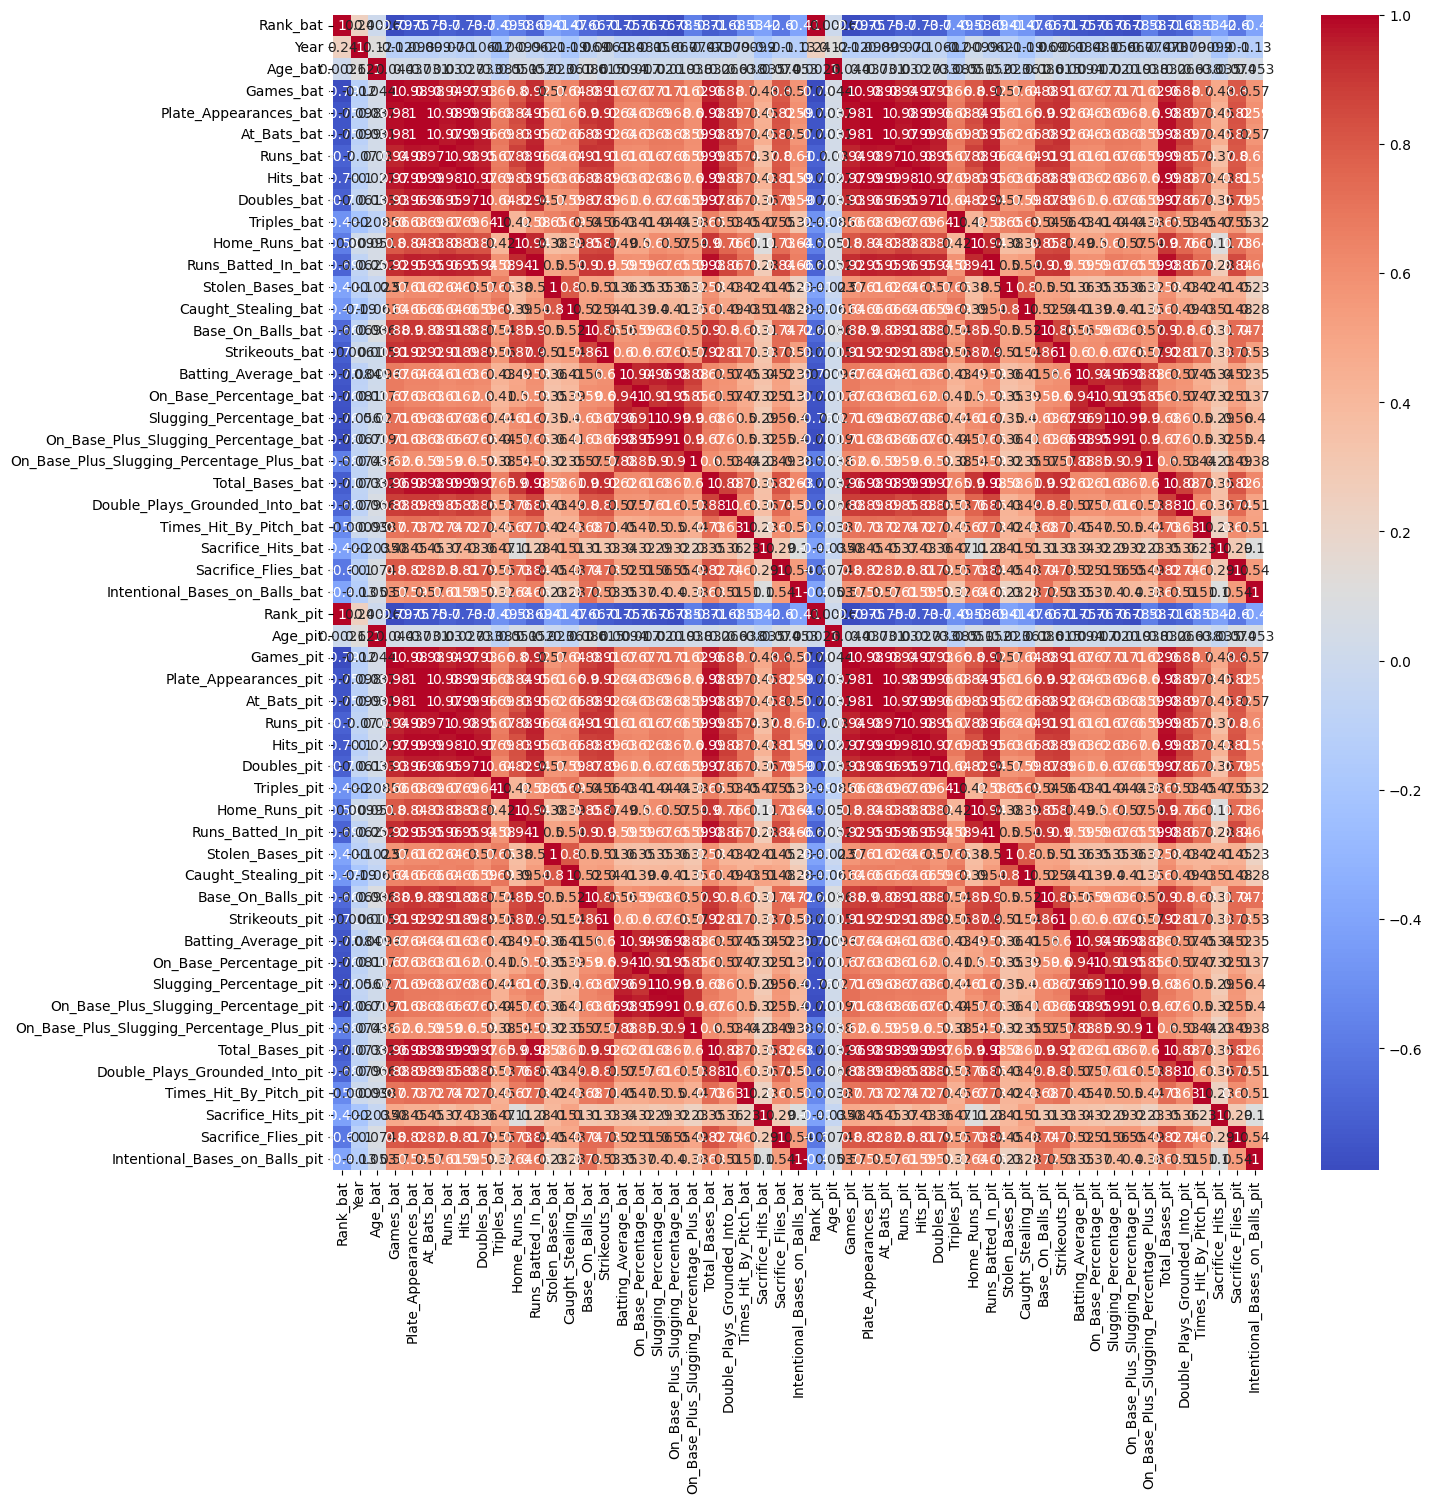

In [22]:
# Select only numeric columns for correlation matrix
numeric_cols = combined_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = combined_df[numeric_cols].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

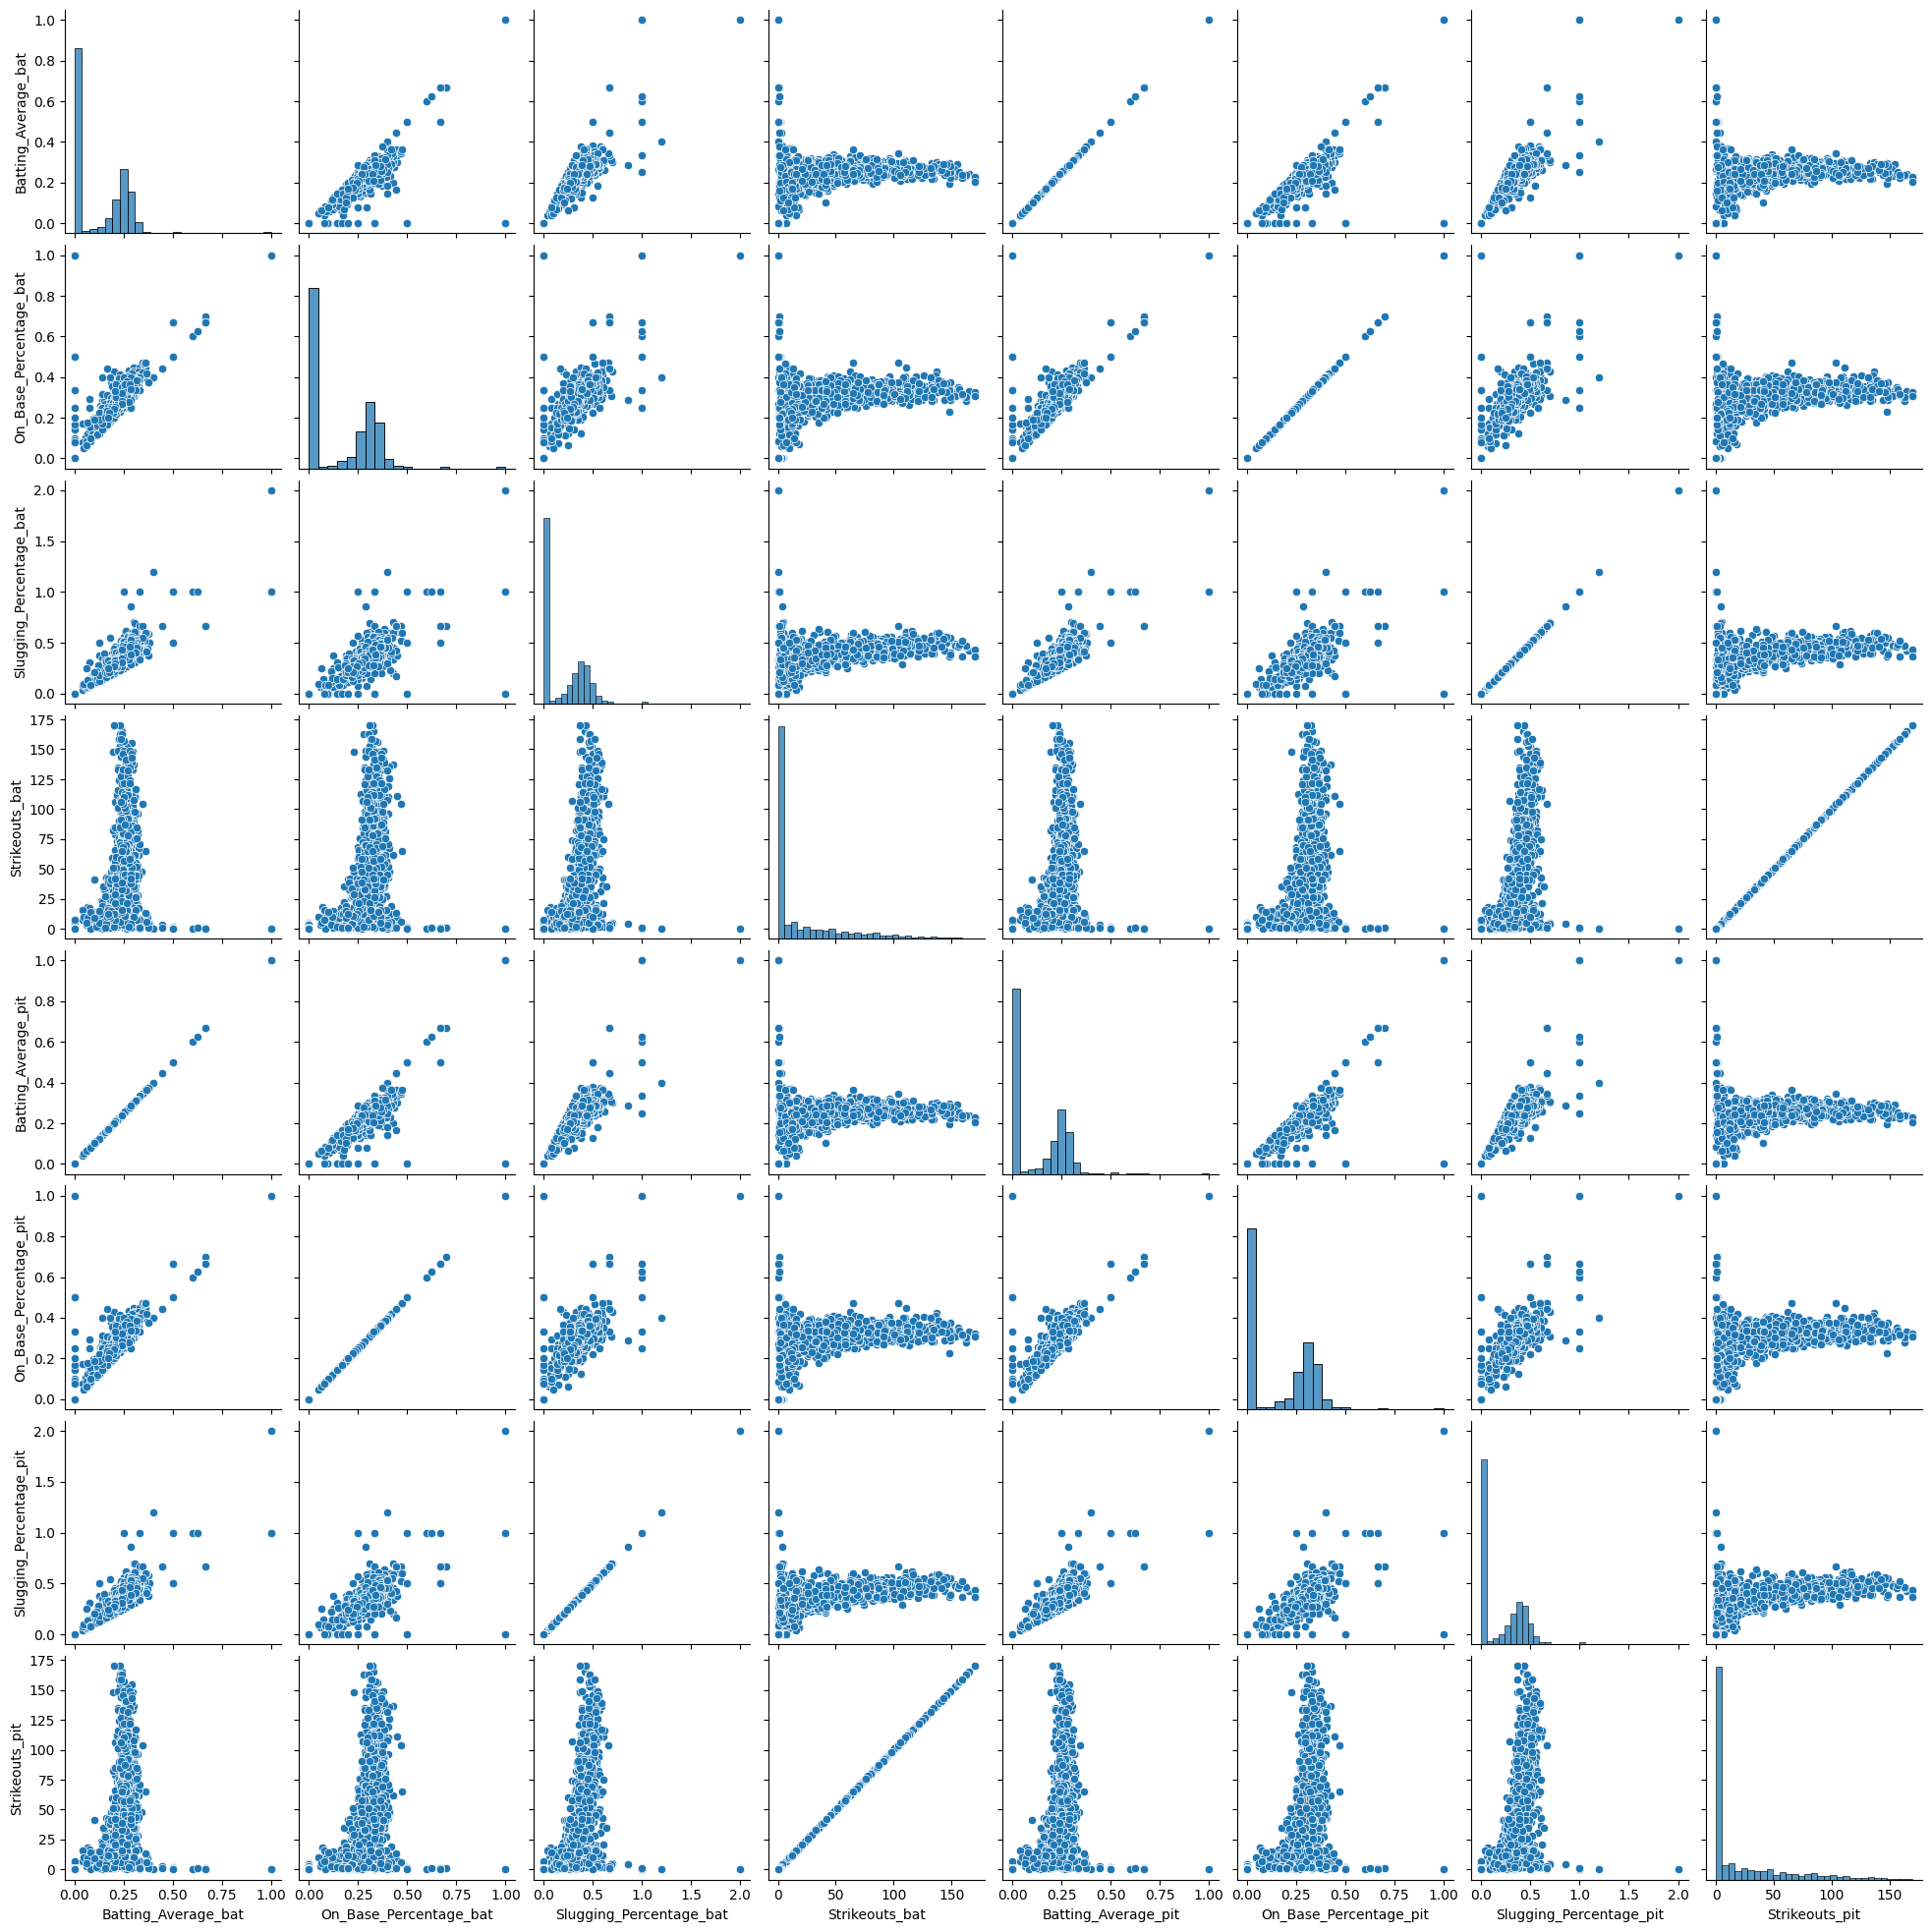

In [23]:
# Plot pair plots for selected key variables
sns.pairplot(combined_df[['Batting_Average_bat', 'On_Base_Percentage_bat', 'Slugging_Percentage_bat', 'Strikeouts_bat', 'Batting_Average_pit', 'On_Base_Percentage_pit', 'Slugging_Percentage_pit', 'Strikeouts_pit']])
plt.show()


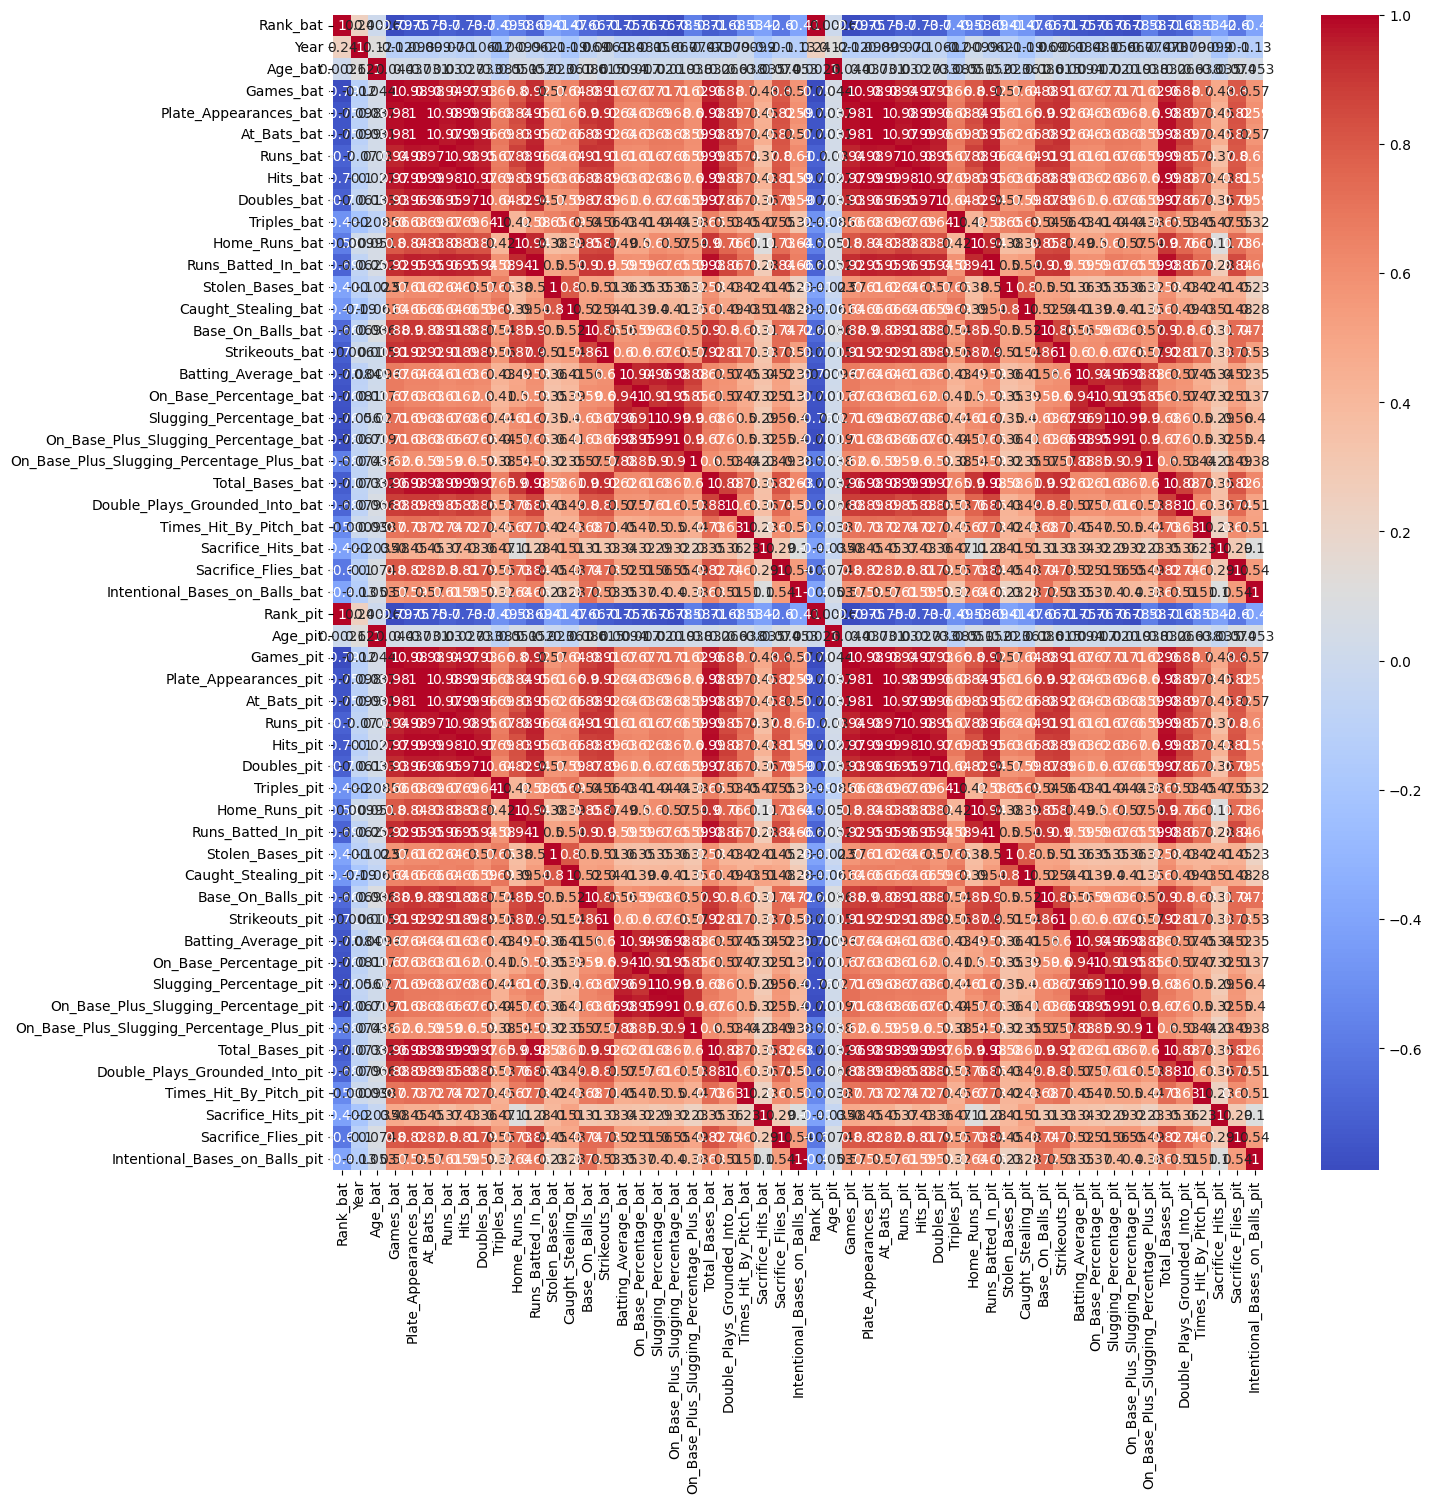

In [24]:
# Select only numeric columns for correlation matrix
numeric_cols = combined_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = combined_df[numeric_cols].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


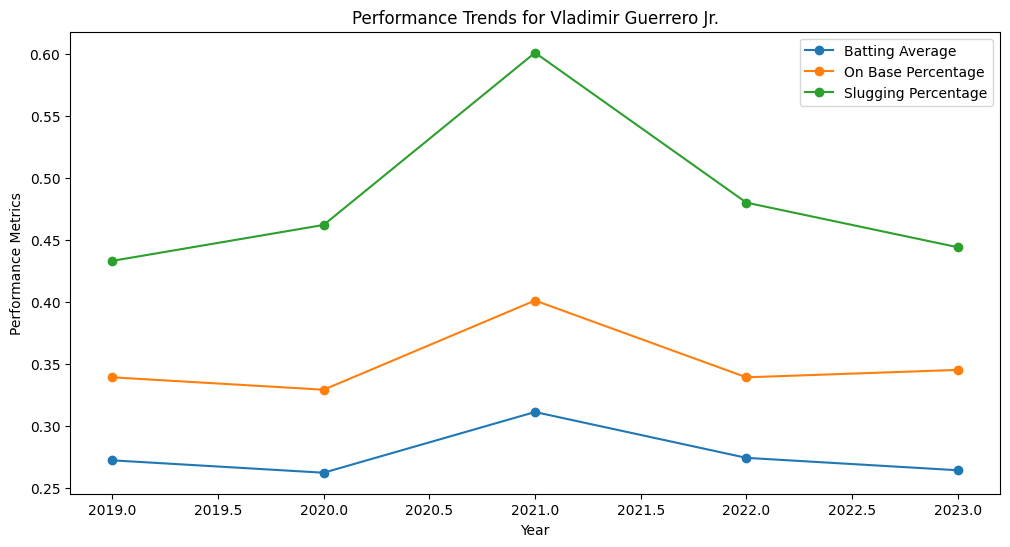

In [25]:
# Example: Analyzing trends for a key player
player_name = 'Vladimir Guerrero Jr.'
player_trends = combined_df[combined_df['Name'] == player_name]

# Plotting performance metrics over the years
plt.figure(figsize=(12, 6))
plt.plot(player_trends['Year'], player_trends['Batting_Average_bat'], marker='o', label='Batting Average')
plt.plot(player_trends['Year'], player_trends['On_Base_Percentage_bat'], marker='o', label='On Base Percentage')
plt.plot(player_trends['Year'], player_trends['Slugging_Percentage_bat'], marker='o', label='Slugging Percentage')
plt.title(f'Performance Trends for {player_name}')
plt.xlabel('Year')
plt.ylabel('Performance Metrics')
plt.legend()
plt.show()


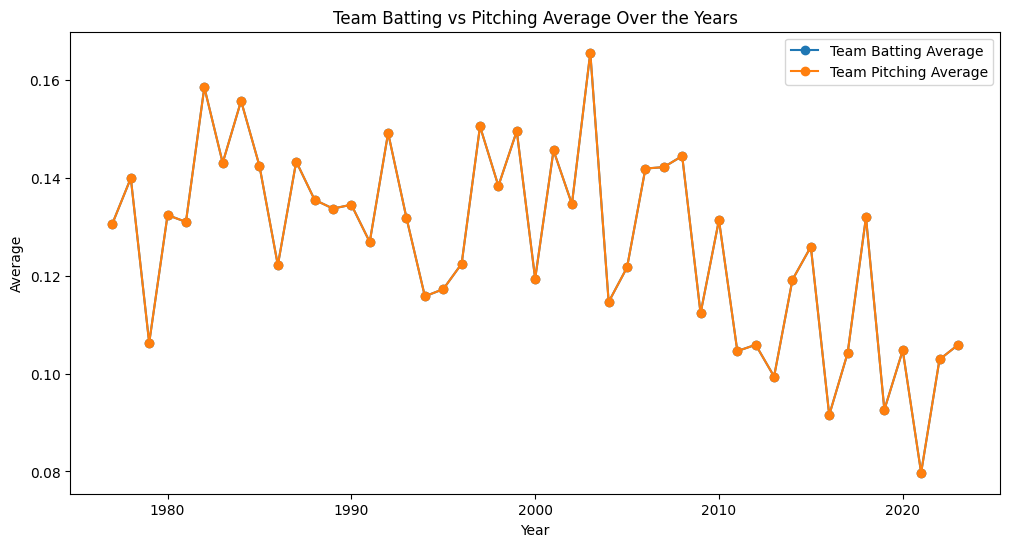

In [26]:
# Example: Comparing team-wide batting and pitching averages over the years
team_batting_avg = combined_df.groupby('Year')['Batting_Average_bat'].mean()
team_pitching_avg = combined_df.groupby('Year')['Batting_Average_pit'].mean()

plt.figure(figsize=(12, 6))
plt.plot(team_batting_avg.index, team_batting_avg.values, marker='o', label='Team Batting Average')
plt.plot(team_pitching_avg.index, team_pitching_avg.values, marker='o', label='Team Pitching Average')
plt.title('Team Batting vs Pitching Average Over the Years')
plt.xlabel('Year')
plt.ylabel('Average')
plt.legend()
plt.show()
